In [3]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

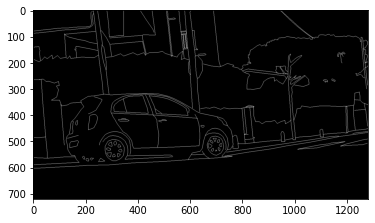

Objective: PSNR


100%|█████████████████████████████████████████████████████████████| 100/100 [01:53<00:00,  1.13s/it]


Round:  0   36.075889772097966


100%|█████████████████████████████████████████████████████████████| 100/100 [02:05<00:00,  1.25s/it]


Round:  1   36.075889772097966


100%|█████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.16s/it]


Round:  2   36.20805061531566


100%|█████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


Round:  3   36.35661158081119


100%|█████████████████████████████████████████████████████████████| 100/100 [02:22<00:00,  1.43s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Round:  4   36.35998158342381




Meaningful r (optimum is in the middle) 5
Total Computation time: 16194.074931621552
PSNR out


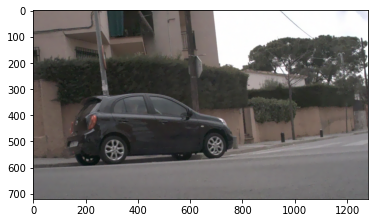

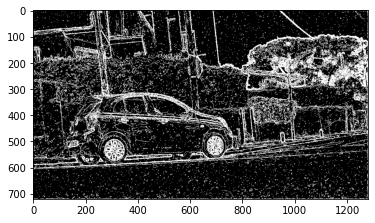

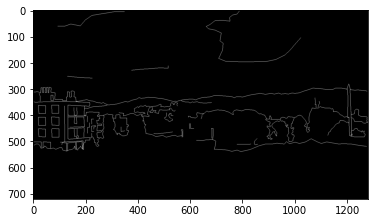

Objective: PSNR


100%|█████████████████████████████████████████████████████████████| 100/100 [02:05<00:00,  1.26s/it]


Round:  0   36.42103640333177


100%|█████████████████████████████████████████████████████████████| 100/100 [02:06<00:00,  1.26s/it]


Round:  1   36.42103640333177


100%|█████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.29s/it]


Round:  2   36.620472199053154


 19%|███████████▊                                                  | 19/100 [00:22<01:41,  1.25s/it]

In [ ]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/BIPED/edges/imgs/train/rgbr/real/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
#         if idim ==0:
#             print('pass')
#             idim += 1
#             pass
#         else:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        x = np.array(Image.open(image_path))/255.
        r,l,_ = np.shape(x)
        delta= 0.05
        z = x+ delta*np.random.normal(0,1,x.shape)

        edge_file_path = "../../../../../Documents/BIPED/edges/edge_maps/train/rgbr/real/"+image_name+".png"
        cont = np.array(Image.open(edge_file_path))/255.


#         plt.figure()
#         plt.imshow(x)
#         plt.show()
#         plt.figure()
#         plt.imshow(z)
#         plt.show()
        plt.figure()
        plt.imshow(cont,'gray')
        plt.show()
#         plt.figure()
#         plt.hist(cont.flatten())
#         plt.show()
        tab_PSNR_out,tab_coord_max_PSNR_out,tab_PSNR_max,out1,out0= golden_section_map(z,x,cont,bmax=3,bmin=-1,lmax=2,lmin=-3,scale_type='10',
                       grid_size=5,max_round=5,objective='PSNR',maxiter=100,stop_crit=1e-4,
                                method='SLPAM',norm_type='l1',eps=2.,eps_AT_min=0.02,A=np.ones((r,l)))
        scipy.io.savemat("../../dataset/BIPED/data/param_dist_PSNR/train/"+image_name+".mat",dict(tab_PSNR_out=tab_PSNR_out,tab_coord_max_PSNR_out=tab_coord_max_PSNR_out,tab_PSNR_max=tab_PSNR_max,out1=out1,out0=out0))
        cont_thres = np.ones_like(out0)*(out0>0.5)
#         
        cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
        plt.figure()
        plt.imshow(out1)
        plt.show()
        plt.figure()
        plt.imshow(cont_thres,'gray')
        plt.show()
        idim += 1
#         if idim ==1:
#             break




In [ ]:
cont_thres = np.ones_like(out0)*(out0>0.2)
# cont_thres = out0

cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
plt.figure()
plt.imshow(cont_thres,cmap='gray')
plt.show()

In [38]:
cont_thres

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.50171601],
       [0.        , 0.        , 0.        , ..., 0.        , 0.40681355,
        0.        ]])

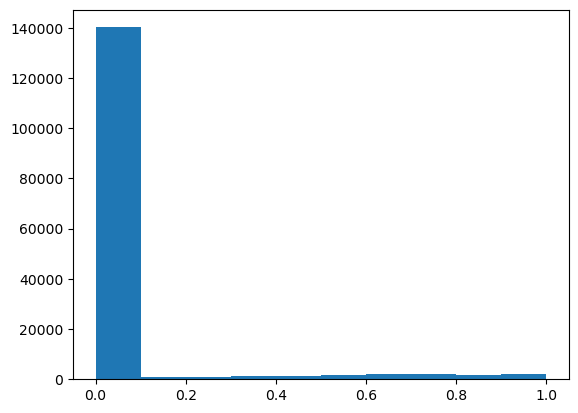

In [39]:
plt.figure()
plt.hist(cont_thres.flatten())
plt.show()